In [170]:
#Importing all the necesssary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE
from sklearn.compose  import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn import linear_model
from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings

from math import sqrt
import random
import warnings
import scipy
warnings.filterwarnings('ignore')

### Import Data

In [97]:
#Reading the data into Dataframe ab1
ab1=pd.read_csv('AB_US_2020.csv')

In [98]:
#Displaying the first few rows of ab1
ab1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [99]:
#Reading only the N'ew York City' data into nyc
nyc=ab1[ab1.city=='New York City']
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
117155,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,04/11/19,0.37,2,365,New York City
117156,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,76,1,349,23/08/20,4.82,1,272,New York City
117157,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,02/12/19,0.36,1,365,New York City
117158,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,7,1,02/01/14,0.01,1,352,New York City
117159,5178,Large Furnished Room Near B'way„ÄÄ,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,473,15/03/20,3.42,1,346,New York City


In [100]:
#data is a copy of nyc used in Regression Model
data=nyc.copy()
data.drop(['name','id', 'host_id', 'host_name','neighbourhood','latitude','longitude','last_review', 'city'], axis=1, inplace=True)


In [101]:
#Fillin empty reviews_per_month by 0
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [102]:
#Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45756 entries, 117155 to 162910
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             45756 non-null  object 
 1   room_type                       45756 non-null  object 
 2   price                           45756 non-null  int64  
 3   minimum_nights                  45756 non-null  int64  
 4   number_of_reviews               45756 non-null  int64  
 5   reviews_per_month               45756 non-null  float64
 6   calculated_host_listings_count  45756 non-null  int64  
 7   availability_365                45756 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.1+ MB


In [103]:
#Counting Neighbourhoods in Neighbourhood_groups
data.neighbourhood_group.value_counts()

Manhattan        20236
Brooklyn         18263
Queens            5746
Bronx             1185
Staten Island      326
Name: neighbourhood_group, dtype: int64

In [104]:
#Counting properties of each room_type
data.room_type.value_counts()

Entire home/apt    23577
Private room       20842
Shared room          944
Hotel room           393
Name: room_type, dtype: int64

In [105]:
#Displaying the first few rows of data
data.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
117155,Manhattan,Entire home/apt,175,3,48,0.37,2,365
117156,Brooklyn,Entire home/apt,76,1,349,4.82,1,272
117157,Brooklyn,Private room,60,29,50,0.36,1,365
117158,Brooklyn,Entire home/apt,175,7,1,0.01,1,352
117159,Manhattan,Private room,79,2,473,3.42,1,346


In [106]:
#Checking if there are any null values in data
data.isnull().sum()

neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## EDA

<AxesSubplot:>

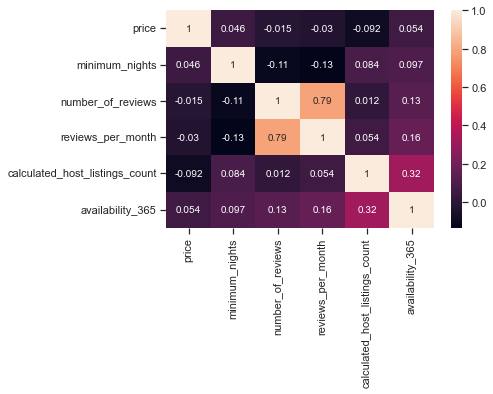

In [107]:
#Correlation between quantitative variables
corr = data.corr(method='kendall')
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Neighbourhood Group')

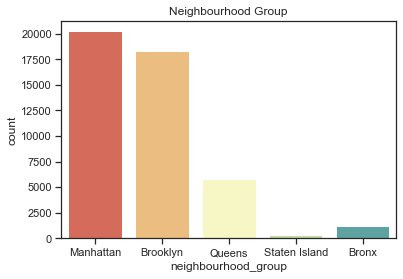

In [108]:
#Airbnb count for each neighborhood
sns.countplot(data['neighbourhood_group'], palette="Spectral")
fig = plt.gcf()
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Room type')

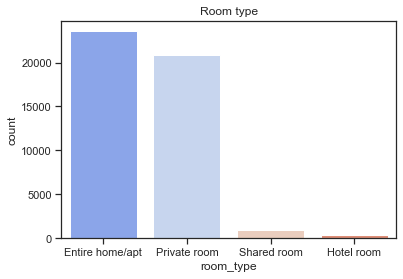

In [109]:
#Airbnb count for each room type
sns.countplot(data['room_type'], palette="coolwarm")
fig = plt.gcf()
plt.title('Room type')

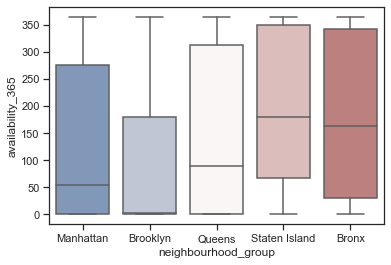

In [110]:
#365 Availability vs Neighbourhood groups
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365',palette='vlag')


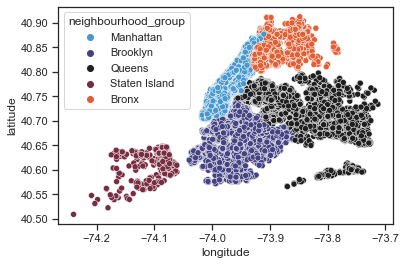

In [111]:
#Neighbourhood group
sns.scatterplot(nyc.longitude,nyc.latitude,hue=nyc.neighbourhood_group,palette='icefire')
plt.ioff()

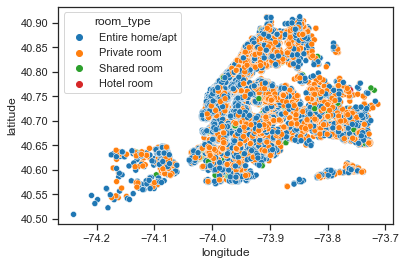

In [112]:
#Room type
sns.scatterplot(nyc.longitude,nyc.latitude,hue=nyc.room_type,palette='tab10')
plt.ioff()

In [114]:
#Average room price for each room type of the neighborhood.
df1 = data.groupby(['neighbourhood_group', 'room_type']).agg({'price': 'mean'}).reset_index()
df1_pivot = pd.pivot_table(df1, values='price',index=['neighbourhood_group'], columns=['room_type'])


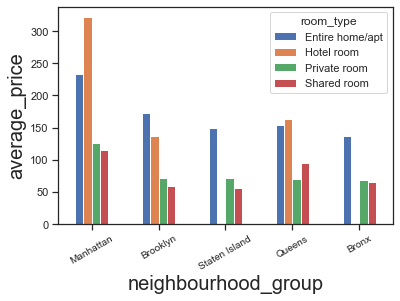

In [115]:
#Plotting neighbourhood_group vs average_price for different types of properties
ax=df1_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('neighbourhood_group', fontsize = 20)
ax.set_ylabel('average_price', fontsize = 20)
labels=list(df1_pivot.sort_values('Private room', ascending=False).index[:5])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()

## Model

In [116]:
#Apply label ecoder for neighbourhood_group and room_type
le = preprocessing.LabelEncoder()
ohe =preprocessing.OneHotEncoder()
data['neighbourhood_group'] = le.fit_transform(data['neighbourhood_group'].values)
data['room_type'] =le.fit_transform(data['room_type'].values)

In [117]:
#Split Dataset into train, validation, test
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=1)
X_train_, X_valid, y_train_, y_valid = train_test_split(X_train,y_train, train_size=0.8,random_state=1)  


In [118]:
#Checking the dimesions of different datasets
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(36604, 7)
(36604,)
(7321, 7)
(7321,)
(9152, 7)
(9152,)


(None, None)

### Linear Regression

In [119]:
#Applying Linear Regression
lm = LinearRegression()
lm.fit(X_train_,y_train_)
y_pred = lm.predict(X_valid)
mse_lm = MSE(y_valid, y_pred)
rmse_lm = sqrt(mse_lm)
print("Test RMSE of Linear Regression: {:.3f}".format(rmse_lm))

Test RMSE of Linear Regression: 263.152


### Ridge Regression

In [120]:
#Applying Ridge Regression
rg = RidgeCV()  
rg.fit(X_train_,y_train_)
print('Best alpha:',rg.alpha_)
y_pred = rg.predict(X_valid)
mse_rg = MSE(y_valid, y_pred)
rmse_rg = mse_rg**(1/2)
print("Test RMSE of Ridge Regression: {:.3f}".format(rmse_rg))

Best alpha: 10.0
Test RMSE of Ridge Regression: 263.151


### Lasso Regression

In [121]:
#Applying Lasso Regression
lasso = LassoCV()
lasso.fit(X_train_,y_train_)
print('Best alpha:',lasso.alpha_)
y_pred = lasso.predict(X_valid)
mse_lasso = MSE(y_valid, y_pred)
rmse_lasso = mse_lasso**(1/2)
print("Test RMSE of Lasso Regression: {:.3f}".format(rmse_lasso))

Best alpha: 2.288957729071879
Test RMSE of Lasso Regression: 263.093


### Decision Tree

In [122]:
#Applying Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=1)
dt.fit(X_train_,y_train_)
y_pred = dt.predict(X_valid)
rmse_dt = sqrt(MSE(y_valid, y_pred))
print("Test RMSE of Decision Tree: {:.3f}".format(rmse_dt))

Test RMSE of Decision Tree: 263.092


### Random Forest

In [123]:
#Applying Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200,min_samples_leaf=0.12,random_state=1)
rf.fit(X_train_,y_train_)
y_pred = rf.predict(X_valid)
rmse_rf = sqrt(MSE(y_valid, y_pred))
print("Test RMSE of Random Forest: {:.3f}".format(rmse_rf))

Test RMSE of Random Forest: 262.972


### Extra Trees Classifier

In [124]:
#Applying Extra Trees Classifier
et = ExtraTreesClassifier()
et.fit(X_train_,y_train_)
y_pred = et.predict(X_valid)
rmse_et = sqrt(MSE(y_valid, y_pred))
print("Test RMSE of Random Forest: {:.3f}".format(rmse_et))

MemoryError: could not allocate 369098752 bytes

### Gradient Boosting

In [125]:
#Applying Gradient Boosting Regressor
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=1)
gb.fit(X_train_,y_train_)
y_pred = gb.predict(X_valid)
mse_gb = MSE(y_valid, y_pred)
rmse_gb = mse_gb**(1/2)

print('Test RMSE of Gradient Boosting: {:.3f}'.format(rmse_gb))

Test RMSE of Gradient Boosting: 218.801


In [126]:
#Percentage
gb.score(X_train_,Y_train_) 

NameError: name 'Y_train_' is not defined

In [ ]:
#Out of 1
sklearn.metrics.r2_score(X_train_, y_train_)

### RMSE Results of Regression Models

In [127]:
#RMSE Results of all Regression Models used
df=pd.DataFrame(
    {'Model': ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Extra Tree','Gradient Boosting'], 
     'RMSE': [rmse_lm,rmse_rg,rmse_lasso,rmse_dt,rmse_rf,rmse_et,rmse_gb]}  
)
df

NameError: name 'rmse_et' is not defined

### Regression Model of our choice on Test Data

In [31]:
#Applying Gradient Boosting Regressor on Test Data
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=1)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
rmse_final = sqrt(MSE(y_test, y_pred))
print("Test RMSE of Gradient Boosting: {:.3f}".format(rmse_final))

Test RMSE of Gradient Boosting: 295.622


### Statistical Analysis

In [128]:
#Displaying the first few rows of nyc
nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
117155,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,3,48,04/11/19,0.37,2,365,New York City
117156,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,76,1,349,23/08/20,4.82,1,272,New York City
117157,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,29,50,02/12/19,0.36,1,365,New York City
117158,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66120,-73.99423,Entire home/apt,175,7,1,02/01/14,0.01,1,352,New York City
117159,5178,Large Furnished Room Near B'way„ÄÄ,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,473,15/03/20,3.42,1,346,New York City


In [129]:
#Info of nyc
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35105 entries, 117155 to 162850
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35105 non-null  int64  
 1   name                            35105 non-null  object 
 2   host_id                         35105 non-null  int64  
 3   host_name                       35105 non-null  object 
 4   neighbourhood_group             35105 non-null  object 
 5   neighbourhood                   35105 non-null  object 
 6   latitude                        35105 non-null  float64
 7   longitude                       35105 non-null  float64
 8   room_type                       35105 non-null  object 
 9   price                           35105 non-null  int64  
 10  minimum_nights                  35105 non-null  int64  
 11  number_of_reviews               35105 non-null  int64  
 12  last_review               

In [130]:
#Counting the null values in the dataframe nyc
nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
city                              0
dtype: int64

In [131]:
#Considering Only Needed Numbers 

needed_nos = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [132]:
#Melting the Dataframe nyc into identifier variables and measured variables

nyc_melt_df = pd.melt(nyc, id_vars= 'id', value_vars = needed_nos)

In [133]:
#Applying statistics on the melted dataframe nyc

nyc_stat = nyc_melt_df.groupby('variable').agg({'value':['min', 'max', 'mean' , 'median', 'std']})\
            .sort_values(('value', 'mean'), ascending = False)
nyc_stat

value                                          
                                 min       max        mean  median         std
variable                                                                      
price                           0.00  10000.00  137.898960  100.00  243.255705
availability_365                0.00    365.00  121.451218   60.00  141.919395
number_of_reviews               1.00    746.00   29.400000    9.00   51.148243
minimum_nights                  1.00   1250.00    7.285315    3.00   20.617511
calculated_host_listings_count  1.00    238.00    4.127674    1.00   14.671834
reviews_per_month               0.01     44.06    0.884193    0.36    1.270947

In [134]:
#Minimum price = 0 refers to free listings and those have to be dropped to have a fair analysis

#finding the number of free listings
free_list = nyc['price'] == 0

print(f"No. of listing with no price: {nyc[free_list].shape[0]}")


No. of listing with no price: 4


In [135]:
#Dropping the free listings & Considering only >0
 
nyc = nyc.query("price > 0")

In [136]:
#Melt & Statistics

nyc_melt_df = pd.melt(nyc, id_vars= 'id', value_vars = needed_nos)

nyc_stat = nyc_melt_df.groupby('variable').agg({'value':['min', 'max', 'mean' , 'median', 'std']})\
            .sort_values(('value', 'mean'), ascending = False)
nyc_stat

value                                          
                                 min       max        mean  median         std
variable                                                                      
price                           9.00  10000.00  137.914675  100.00  243.265111
availability_365                0.00    365.00  121.465058   60.00  141.921558
number_of_reviews               1.00    746.00   29.402553    9.00   51.150524
minimum_nights                  1.00   1250.00    7.286032    3.00   20.618577
calculated_host_listings_count  1.00    238.00    4.127575    1.00   14.672667
reviews_per_month               0.01     44.06    0.884191    0.36    1.270971

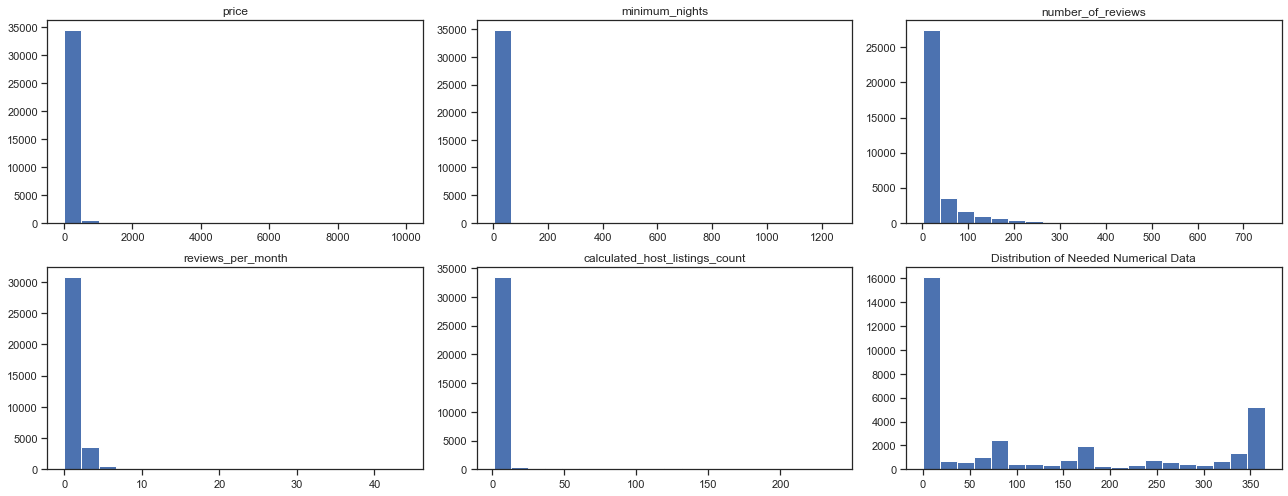

In [137]:
#Distribution Histograms based on the needed_nos

nyc[needed_nos].hist(figsize = (18,7), layout = (2,3), grid = False, bins = 20)

plt.title('Distribution of Needed Numerical Data')
plt.tight_layout()
plt.show()

In [138]:
#Distribution is very random and it might be due to Outliers

In [139]:
#Outlier Identification
def identifyOutliers(df, column_name = ""):
        iqr = df[column_name].quantile(.75) - df[column_name].quantile(.25)
        lowerbound = (df[column_name].quantile(.25)) - iqr * 1.5
        upperbound = (df[column_name].quantile(.75)) + iqr * 1.5
        lowerbound_outliers = df[df[column_name] < lowerbound]
        higherbound_outliers = df[df[column_name] > upperbound]
        outliers = pd.concat([lowerbound_outliers,higherbound_outliers])
        return outliers

In [140]:
#Outlier Count
def countOutliers(df, column_name = ""):
        iqr = df[column_name].quantile(.75) - df[column_name].quantile(.25)
        lowerbound = (df[column_name].quantile(.25)) - iqr * 1.5
        upperbound = (df[column_name].quantile(.75)) + iqr * 1.5
        lowerbound_outliers = df[df[column_name] < lowerbound]
        higherbound_outliers = df[df[column_name] > upperbound]
        outliers = pd.concat([lowerbound_outliers,higherbound_outliers])
        return len(outliers)

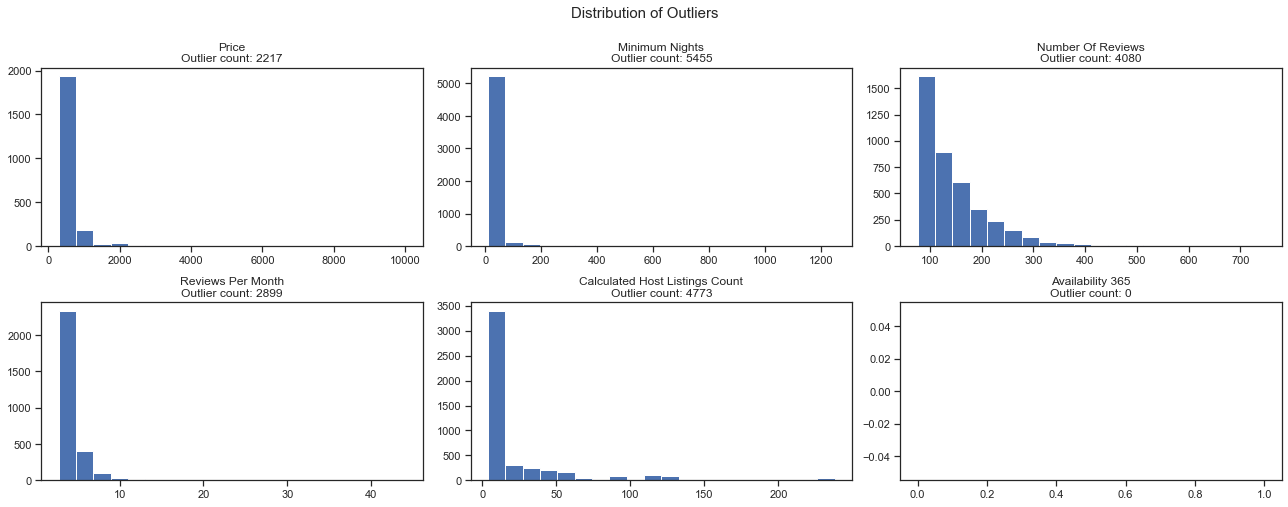

In [141]:
# Distribution of Outliers
fig, axes = plt.subplots(2,3, figsize = (18,7))
plt.suptitle('Distribution of Outliers', fontsize = 15, y = 1)

for col, ax in zip(nyc[needed_nos], axes.flat):
        outliers = identifyOutliers(nyc, col)

        #plot the histogram in the specified axes
        outliers[col].hist(bins = 20, grid = False, ax = ax)

        #chart formatting
        ax.set_title(f"{col.replace('_', ' ').title()}\nOutlier count: {countOutliers(nyc, col)}")

plt.tight_layout()
plt.show()

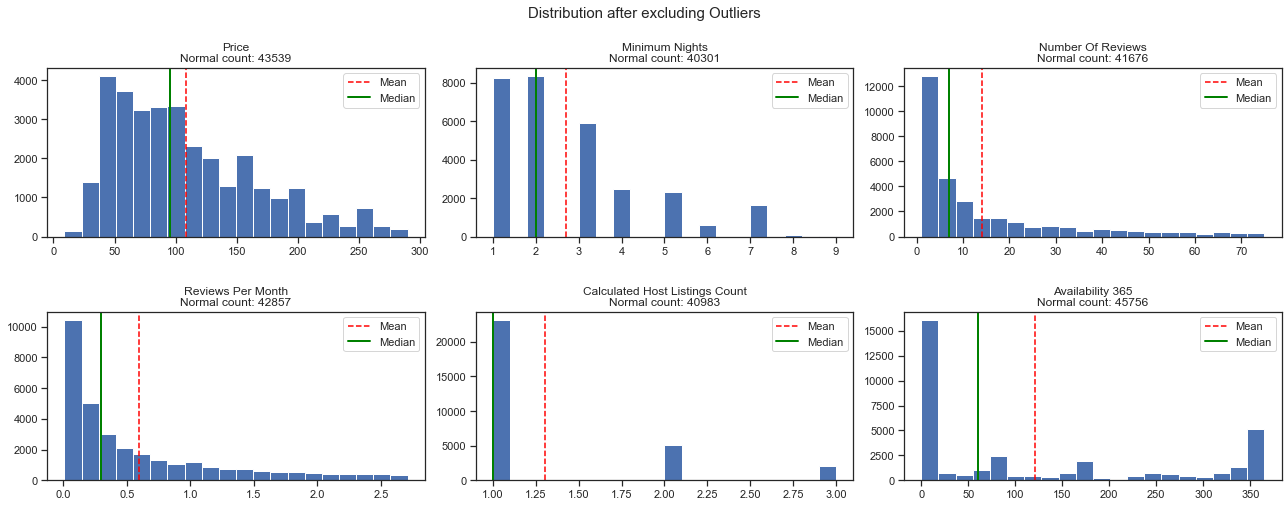

In [142]:
# Distribution Excluding Outliers

fig, axes = plt.subplots(2,3, figsize = (18,7))
plt.suptitle('Distribution after excluding Outliers', fontsize = 15, y = 1)

for col, ax in zip(nyc[needed_nos], axes.flat):
        outliers = identifyOutliers(nyc, col)
        normal = nyc[~ nyc.index.isin(outliers.index)]
#plot the histogram in the specified axes
        normal[col].hist(bins = 20, grid = False, ax = ax)

        #chart formatting
        ax.axvline(x = normal[col].mean(), color = 'red', label = 'Mean', linestyle = '--')
        ax.axvline(x = normal[col].median(), color = 'green', label = 'Median', linewidth = 2)
        ax.legend()
        ax.set_title(f"{col.replace('_', ' ').title()}\nNormal count: {len(data) - countOutliers(nyc, col)}")

plt.tight_layout(h_pad=3)
plt.show()

## HYPOTHESES

### 1.  THERE IS AN ASSOCIATION BETWEEN NEIGHBOURHOOD AND ROOM TYPE

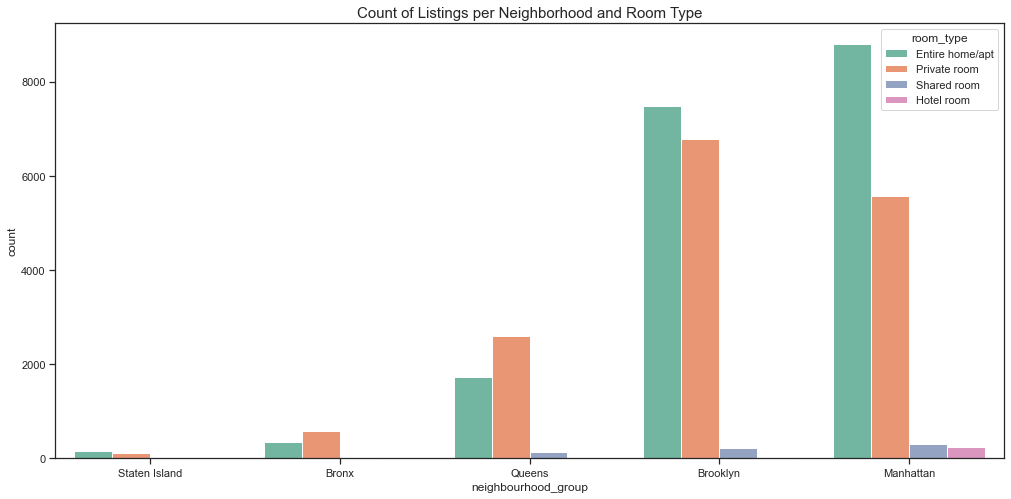

In [143]:
#Neighbourhoood analysis

#Parameters
sns.set(rc = {'figure.figsize':(17,8)},
        style = 'ticks')

#Sorting Values based on count
order = nyc['neighbourhood_group'].value_counts().sort_values().index

#Plotting different properties as neighbourhood group vs count
sns.countplot(x = 'neighbourhood_group', data = nyc, order = order, hue = 'room_type', palette = 'Set2')

#Counting the Listings per Neighbourhood
plt.title('Count of Listings per Neighborhood and Room Type', fontsize = 15)
plt.show()

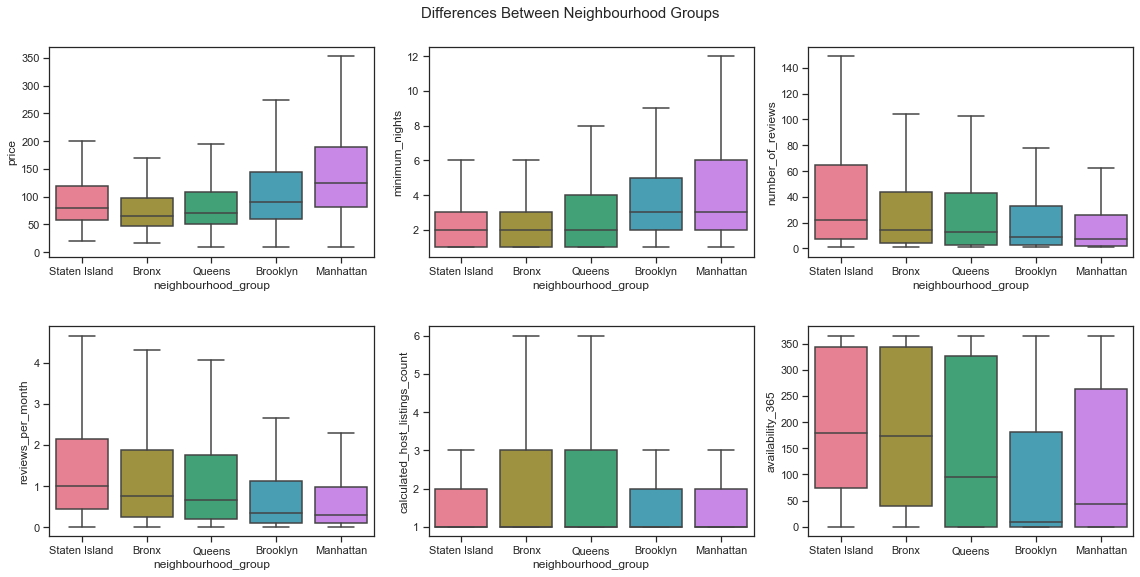

In [144]:
#Making subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

#Sorting based on count of neighbourhood_group
order = nyc['neighbourhood_group'].value_counts(ascending = True).index

#plotting neighbourhood_group against all quantitative variables
for col, ax in zip(nyc[needed_nos], axes.flat):
    sns.boxplot(x='neighbourhood_group',
                y=col,
                data=nyc,
                showfliers=False,
                ax=ax,
                palette='husl',
                order=order)
    
ax.set_xlabel('')

#Main title
plt.suptitle('Differences Between Neighbourhood Groups', fontsize=15, y=1)
plt.tight_layout(h_pad=3)

#Displaying the plot
plt.show()

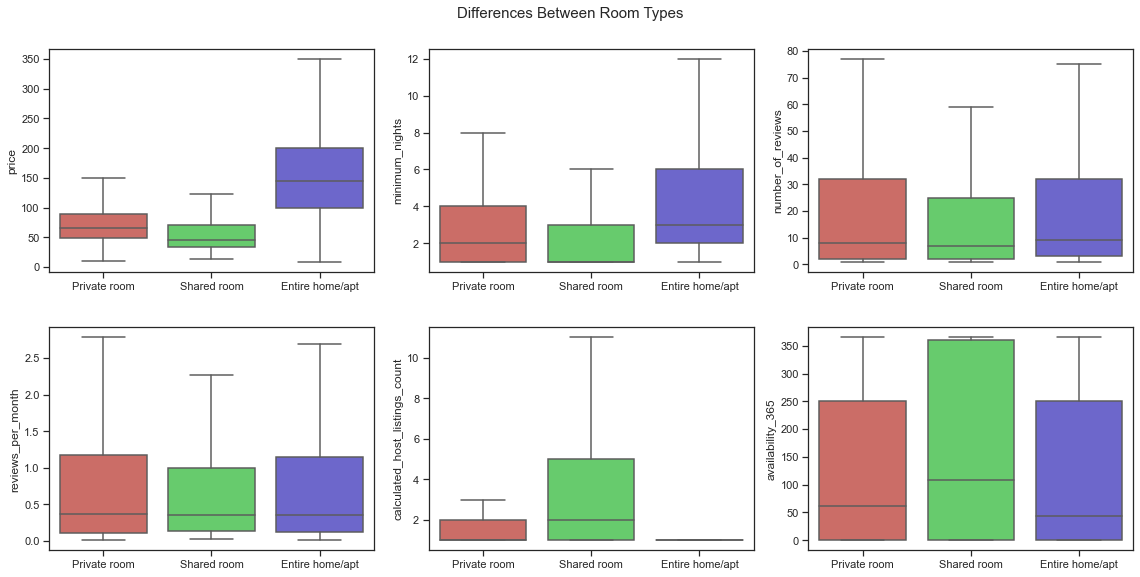

In [145]:
#Making subplots
fig, axes = plt.subplots(2,3, figsize = (16,8))

#Different types of rooms 
order = ['Private room', 'Shared room', 'Entire home/apt', 'Hotel room']

#Plotting different types of room across different quantitative variables
for col, ax in zip(nyc[needed_nos], axes.flat):
        sns.boxplot(x = 'room_type', y = col, data = nyc, showfliers = False, ax = ax, palette = 'hls', order = order)
        ax.set_xlabel('')

#Adding Title
plt.suptitle('Differences Between Room Types', fontsize = 15, y = 1)
plt.tight_layout(h_pad = 3)

#Displaying the plot
plt.show()

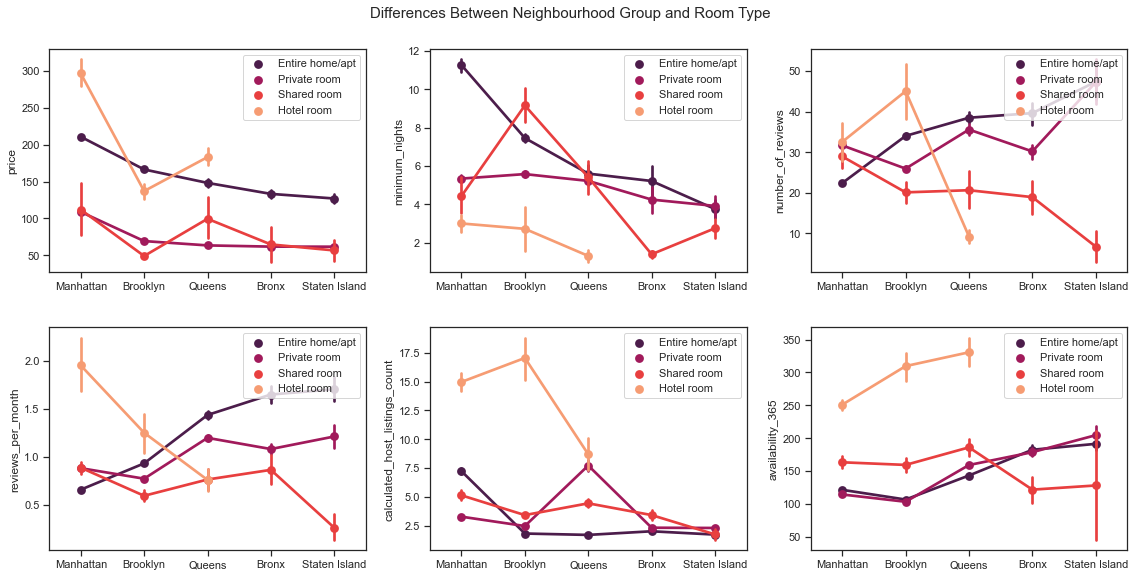

In [146]:
#Making subplots
fig, axes = plt.subplots(2,3, figsize = (16,8))

#sorting based on the count of Neighbourhood group
order = nyc['neighbourhood_group'].value_counts().index

#Plotting different types of properties in Neighbourhood group vs price 
for col, ax in zip(nyc[needed_nos], axes.flat):
        sns.pointplot(hue = 'room_type', y = col, data = nyc, x = 'neighbourhood_group', join = True, ci = 68, palette = 'rocket', order = order, ax = ax)
        ax.set_xlabel('')
        ax.legend(loc = 'upper right')

#Adding title
plt.suptitle('Differences Between Neighbourhood Group and Room Type', fontsize = 15, y = 1)
plt.tight_layout(h_pad = 3)

#Displaying the plot
plt.show()

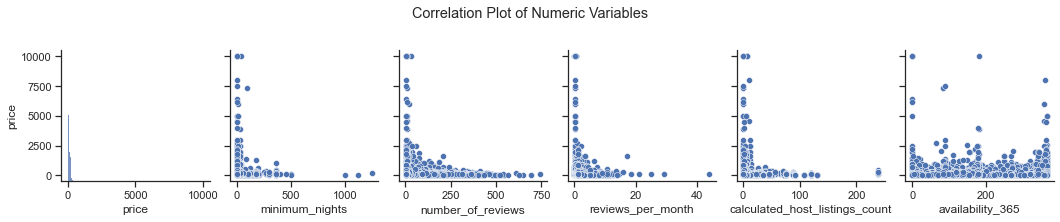

In [147]:
#Plotting scatterplots
sns.pairplot(nyc[needed_nos], y_vars = 'price', height = 2.5)

#Adding title
plt.suptitle('Correlation Plot of Numeric Variables', y = 1.2)

#Displaying the plot
plt.show()

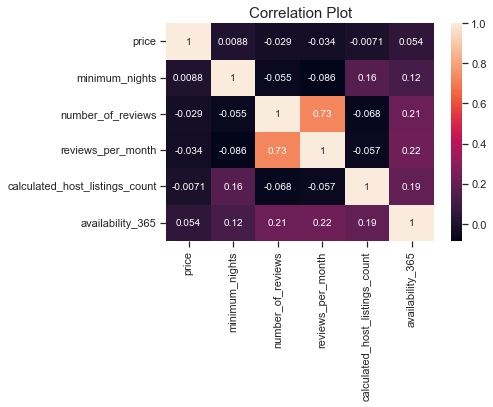

In [171]:
#Plotting correlation heatmap of all quantitative variables
sns.heatmap(nyc[needed_nos].corr(), annot = True)

#Adding title
plt.title('Correlation Plot', fontsize = 15)

#Displaying the plot
plt.show()

In [149]:
#Creating a crosstab with neighbourhood_group and room_type
table = pd.crosstab(nyc['neighbourhood_group'], nyc['room_type'], margins = True, normalize = True)
table

room_type,Entire home/apt,Hotel room,Private room,Shared room,All
neighbourhood_group,,,,,
Bronx,0.009686,0.000000,0.016296,0.000940,0.026922
Brooklyn,0.213356,0.000712,0.193043,0.006268,0.413379
Manhattan,0.250620,0.006780,0.158913,0.008461,0.424774
Queens,0.049372,0.000370,0.073730,0.003732,0.127204
Staten Island,0.004273,0.000000,0.003333,0.000114,0.007721
All,0.527307,0.007863,0.445315,0.019515,1.000000


In [150]:
#Finding p_value using chi2_contingency
p_val = scipy.stats.chi2_contingency(table, correction = True)[1]

print(f'P-value is: {p_val}')

P-value is: 1.0


### Result of Hypothesis 1: Value is > 0.05, so Null Hypothesis is possible!

### 2. AVERAGE PRICE IS ASSOCIATED TO NEIGHBOURHOOD GROUP

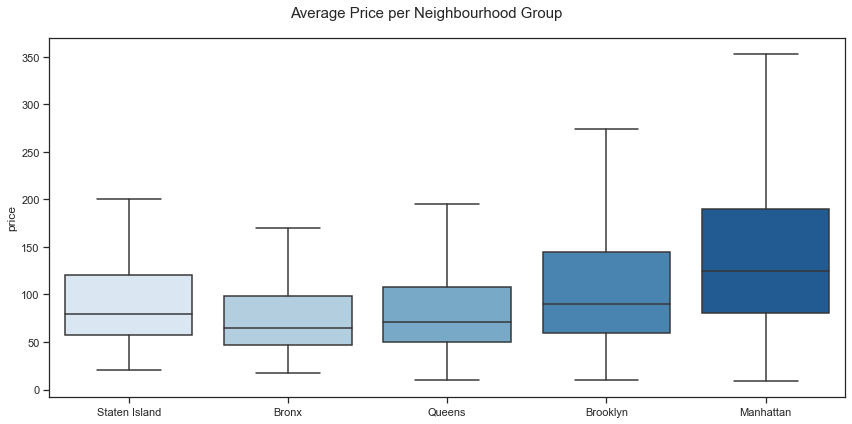

In [151]:
#parameters
fig, axes = plt.subplots(figsize = (12,6))


order = nyc['neighbourhood_group'].value_counts(ascending = True).index

#Plotting average price per neighbourhood_group
sns.boxplot(x='neighbourhood_group',
            y='price',
            data=nyc,
            showfliers=False,
            palette='Blues',
            order=order)

#Adding title
plt.suptitle('Average Price per Neighbourhood Group', fontsize=15, y=.98)
plt.xlabel('')
plt.tight_layout(h_pad=3)

#Displaying the plot
plt.show()

In [152]:
#AVON Oneway, Price & Neighbourhood_group
f_statistic, p_val = scipy.stats.f_oneway(nyc[nyc['neighbourhood_group'] == 'Staten Island']['price'],
                                         nyc[nyc['neighbourhood_group'] == 'Queens']['price'],
                                        nyc[nyc['neighbourhood_group'] == 'Bronx']['price'],
                                        nyc[nyc['neighbourhood_group'] == 'Brooklyn']['price'],
                                        nyc[nyc['neighbourhood_group'] == 'Manhattan']['price'])

print(f'P-value is: {p_val}')

P-value is: 5.6061313398727895e-118


### Result of Hypothesis 2: Value < alpha value of 0.05. So, Null Hypothesis is rejected.

### 3. AVERAGE PRICE IN MANHATTAN GREATER THAN THE AVERAGE PRICE IN STATEN ISLAND, BRONX, QUEENS, AND BROOKLYN

In [153]:
#Price of Manhattan and Price of everything other than Manhattan
manhattan = nyc[nyc['neighbourhood_group'] == 'Manhattan']['price']
others = nyc[nyc['neighbourhood_group'] != 'Manhattan']['price']

scipy.stats.ttest_ind(manhattan, others)

Ttest_indResult(statistic=22.718402730578557, pvalue=1.94369866882689e-113)

### Result of Hypothesis 3: Value < alpha value of 0.05. So, Null Hypothesis is rejected.

### 4. AVERAGE AVAILABILITY DAYS IS ASSOCIATED TO NEIGHBORHOOD GROUP

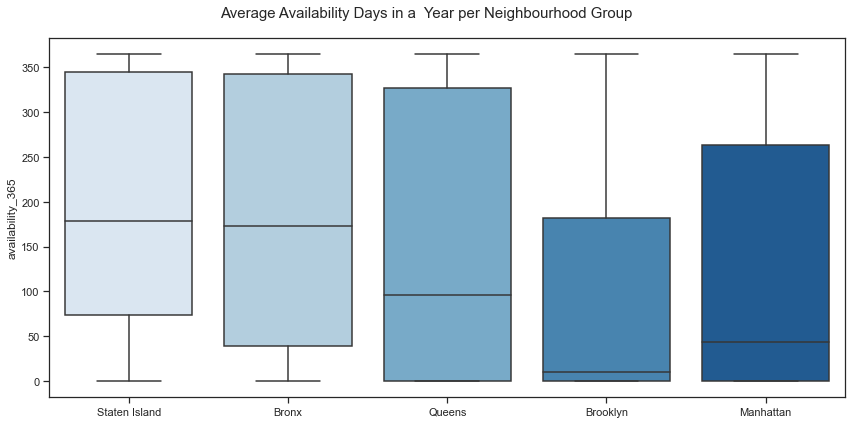

In [154]:
#Parameters
fig, axes = plt.subplots(figsize = (12,6))

#Sorting based on the count of Neighbourhood_group
order = nyc['neighbourhood_group'].value_counts(ascending = True).index

#Plot the average availability days in all neighbourhood groups
sns.boxplot(x='neighbourhood_group',
            y='availability_365',
            data=nyc,
            showfliers=False,
            palette='Blues',
            order=order)

#Adding title
plt.suptitle('Average Availability Days in a  Year per Neighbourhood Group', fontsize=15, y=.98)
plt.xlabel('')
plt.tight_layout(h_pad=3)

#Displaying the plot
plt.show()

In [155]:
#AVON Oneway; availability_365 & neighbourhood_group
f_statistic, p_val = scipy.stats.f_oneway(nyc[nyc['neighbourhood_group'] == 'Staten Island']['availability_365'],
                                           nyc[nyc['neighbourhood_group'] == 'Queens']['availability_365'],
                                           nyc[nyc['neighbourhood_group'] == 'Bronx']['availability_365'],
                                           nyc[nyc['neighbourhood_group'] == 'Brooklyn']['availability_365'],
                                           nyc[nyc['neighbourhood_group'] == 'Manhattan']['availability_365'])

print(f'P-value is: {p_val}')

P-value is: 1.2229478520549328e-136


### Result of Hypothesis 4: Value < alpha value of 0.05. So, Null Hypothesis is rejected.

### 5. AVERAGE PRICE IS ASSOCIATED TO ROOM TYPE

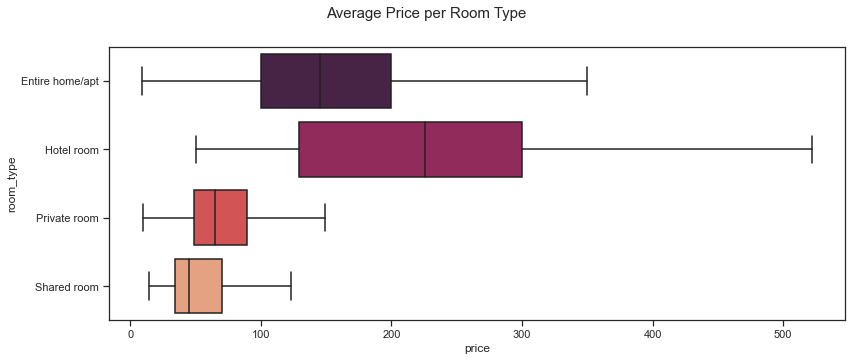

In [156]:
#Parameters
fig, axes = plt.subplots(figsize = (12,5))

#Sorting as per price of each room_type
order = nyc.groupby('room_type')['price'].mean().index

#Plotting Price vs room_type
sns.boxplot(y = 'room_type', x = 'price', data = nyc, showfliers = False, palette = 'rocket', order = order)

#Adding title
plt.suptitle('Average Price per Room Type', fontsize = 15, y = 1)
plt.tight_layout(h_pad = 3)
ax.set_xlabel('')

#Displaying the plot
plt.show()

In [157]:
#AVON oneway; price & rooomtype
f_statistic, p_val = scipy.stats.f_oneway(nyc[nyc['room_type'] == 'Entire home/apt']['price'],
                                          nyc[nyc['room_type'] == 'Private room']['price'],
                                          nyc[nyc['room_type'] == 'Shared room']['price'])
                                          
                                           
print(f'P-value is: {p_val}')

P-value is: 0.0


### Result of Hypothesis 5: Value < alpha value of 0.05. So, Null Hypothesis is rejected.

### 6. AVERAGE AVAILABILITY DAYS IS ASSOCIATED TO ROOM TYPE

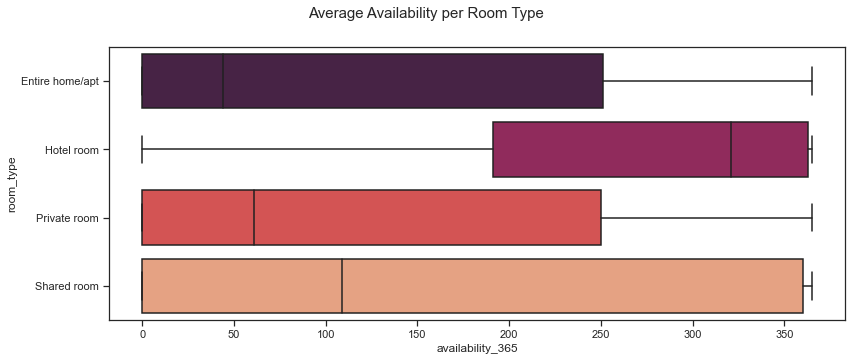

In [158]:
#configure parameters
fig, axes = plt.subplots(figsize = (12,5))

#define the order
order = nyc.groupby('room_type')['availability_365'].mean().index

#plot the data
sns.boxplot(y = 'room_type', x = 'availability_365', data = nyc, showfliers = False, palette = 'rocket', order = order)

#customize chart
plt.suptitle('Average Availability per Room Type', fontsize = 15, y = 1)
plt.tight_layout(h_pad = 3)
ax.set_xlabel('')

#display
plt.show()

In [159]:
#AVON oneway; Availability_365 & room_type
f_statistic, p_val = scipy.stats.f_oneway(nyc[nyc['room_type'] == 'Entire home/apt']['availability_365'],
                                          nyc[nyc['room_type'] == 'Private room']['availability_365'],
                                          nyc[nyc['room_type'] == 'Shared room']['availability_365'])
                                          
                                           
print(f'P-value is: {p_val}')

P-value is: 2.646387461526576e-15


### Result of Hypothesis 6: Value < alpha value of 0.05. So, Null Hypothesis is rejected.

## ADDRESSING THE PROBLEM STATEMENT:

## What type of property should the investors invest in and where?

In [160]:
#creating a new column - 'income'
nyc['income'] = (365 - nyc['availability_365']) * nyc['price']

display(nyc.groupby('neighbourhood_group')['income'].mean().sort_values().reset_index())
display(nyc.groupby('room_type')['income'].mean().sort_values().reset_index())

,neighbourhood_group,income
0,Bronx,14516.348148
1,Staten Island,15913.387454
2,Queens,19763.430011
3,Brooklyn,29280.015507
4,Manhattan,39065.156405


,room_type,income
0,Shared room,16607.121168
1,Private room,19064.060777
2,Hotel room,32790.047101
3,Entire home/apt,42961.393592


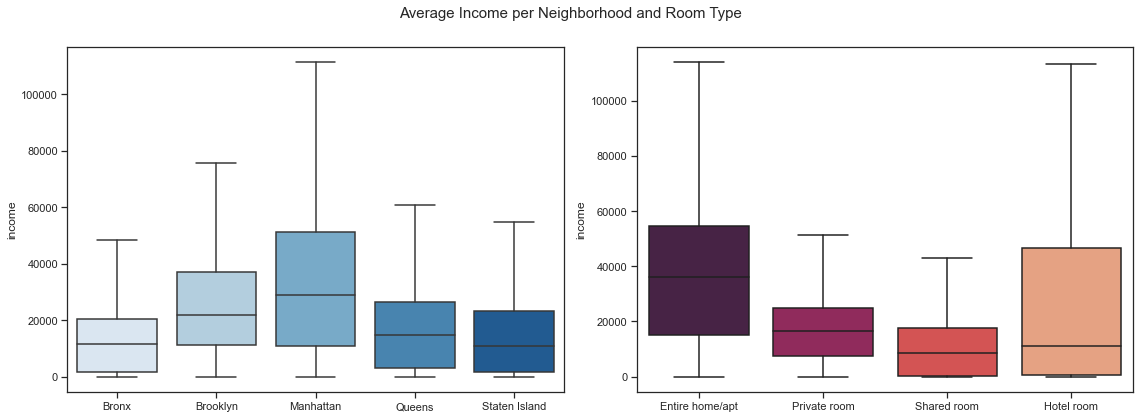

In [161]:
#Parameters
fig = plt.figure(figsize = (16,6))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)



#Neighbourhood group vs Income
order = nyc.groupby('neighbourhood_group')['income'].mean().index
sns.boxplot(x = 'neighbourhood_group', y = 'income', data = nyc, showfliers = False, palette = 'Blues', order = order, ax = ax0)


#Room type vs Income
sns.boxplot(x = 'room_type', y = 'income', data = nyc, showfliers = False, palette = 'rocket', ax = ax1)

#Adding title
plt.suptitle('Average Income per Neighborhood and Room Type', fontsize = 15, y = 1)
plt.tight_layout(h_pad = 3)
ax0.set_xlabel('')
ax1.set_xlabel('')

#Displaying the Plot
plt.show()

In [162]:
#Displaying the 'No guest' scenario
no_guest = nyc['availability_365'] == 365
data_no_guest = nyc[no_guest]
data_no_guest.groupby('neighbourhood_group')['name'].count().sort_values().reset_index()

,neighbourhood_group,name
0,Staten Island,16
1,Bronx,79
2,Queens,404
3,Brooklyn,642
4,Manhattan,1054


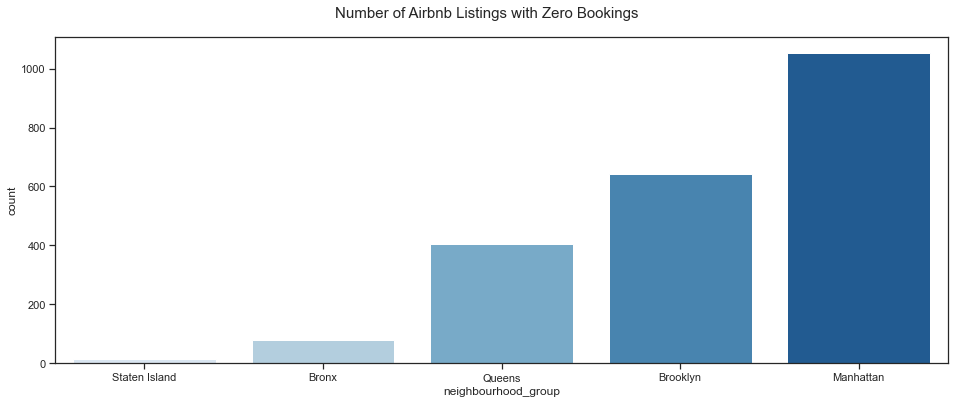

In [163]:
#Parameters
fig = plt.figure(figsize = (16,6))


#Neighbourhood vs count
order = data_no_guest.groupby('neighbourhood_group')['id'].count().sort_values().index
sns.countplot(x = 'neighbourhood_group',data = data_no_guest,palette = 'Blues', order = order)


#Adding title
plt.suptitle('Number of Airbnb Listings with Zero Bookings', fontsize = 15, y = .95)
ax0.set_xlabel('')
ax1.set_xlabel('')

#Displaying the plot
plt.show()

In [164]:
#Defining the column 'booked'
nyc['booked'] = [1 if i != 0 else 0 for i in nyc.availability_365]

In [165]:
#Adding new column 'booked' and viewing it with corresponding neighbourhood_group and room_type
booking = nyc.groupby(['neighbourhood_group','room_type'], as_index = False)['booked'].mean()\
              .sort_values('booked', ascending = False).reset_index(drop = True)
booking

,neighbourhood_group,room_type,booked
0,Queens,Hotel room,1.000000
1,Manhattan,Hotel room,0.941176
2,Brooklyn,Hotel room,0.920000
3,Staten Island,Private room,0.871795
4,Staten Island,Entire home/apt,0.866667
5,Bronx,Shared room,0.818182
6,Bronx,Entire home/apt,0.814706
7,Bronx,Private room,0.786713
8,Queens,Shared room,0.732824
9,Queens,Private room,0.722179


In [166]:
#Calculating occupancy_rate
nyc['occupancy_rate'] = (365 - nyc['availability_365'])/365

occupancy = nyc.groupby(['neighbourhood_group', 'room_type'], as_index = False)['occupancy_rate'].mean()\
                .sort_values('occupancy_rate', ascending = False).reset_index(drop = True)
occupancy

,neighbourhood_group,room_type,occupancy_rate
0,Brooklyn,Private room,0.717224
1,Brooklyn,Entire home/apt,0.708035
2,Manhattan,Private room,0.686862
3,Manhattan,Entire home/apt,0.667511
4,Bronx,Shared room,0.666750
5,Staten Island,Shared room,0.649315
6,Queens,Entire home/apt,0.607764
7,Queens,Private room,0.564031
8,Brooklyn,Shared room,0.563624
9,Manhattan,Shared room,0.552659


In [167]:
#Calculating income based on price and value of booked
income = nyc.groupby(['neighbourhood_group','room_type']).agg({'booked':'mean', 'price':'mean'})
income

booked       price
neighbourhood_group room_type                            
Bronx               Entire home/apt  0.814706  133.297059
                    Private room     0.786713   61.896853
                    Shared room      0.818182   64.848485
Brooklyn            Entire home/apt  0.539591  166.368941
                    Hotel room       0.920000  137.080000
                    Private room     0.496753   69.401564
                    Shared room      0.681818   49.190909
Manhattan           Entire home/apt  0.544959  210.641355
                    Hotel room       0.941176  296.327731
                    Private room     0.536752  108.929724
                    Shared room      0.656566  111.996633
Queens              Entire home/apt  0.691864  148.174264
                    Hotel room       1.000000  183.076923
                    Private room     0.722179   63.558733
                    Shared room      0.732824   99.564885
Staten Island       Entire home/apt  0.866667  127.040000
                    Private room     0.871795   61.820513
                    Shared room      0.500000   56.750000

In [168]:
#Building Model dataframe = income dataframe + occupancy dataframe
model = pd.merge(income, occupancy, how = 'left', on=['neighbourhood_group', 'room_type'])

#Adding a new column - 'weighted annual income' - calculated based on price, occupancy_rate and value of booked
model['weighted_annual_income'] = model['price'] * 365 * model['occupancy_rate'] * model['booked']
model = model.sort_values(['occupancy_rate'], ascending = True).reset_index(drop = True)

model

,neighbourhood_group,room_type,booked,price,occupancy_rate,weighted_annual_income
0,Queens,Hotel room,1.000000,183.076923,0.093994,6280.946746
1,Brooklyn,Hotel room,0.920000,137.080000,0.151671,6981.648896
2,Manhattan,Hotel room,0.941176,296.327731,0.312386,31800.081616
3,Staten Island,Private room,0.871795,61.820513,0.439667,8648.964772
4,Staten Island,Entire home/apt,0.866667,127.040000,0.475799,19120.931556
5,Queens,Shared room,0.732824,99.564885,0.490432,13061.037832
6,Bronx,Entire home/apt,0.814706,133.297059,0.500459,19837.322489
7,Bronx,Private room,0.786713,61.896853,0.510466,9072.863300
8,Manhattan,Shared room,0.656566,111.996633,0.552659,14833.145195
9,Brooklyn,Shared room,0.681818,49.190909,0.563624,6899.787256


In [169]:
#Defining a threshold value
thresh =  model['weighted_annual_income'].mean()


#Choosing the highest income that is greater than the threshold with the lowest occupancy rate
for i, row, in model[['weighted_annual_income', 'neighbourhood_group', 'room_type']].iterrows():
    if model.loc[i, 'weighted_annual_income'] > thresh:
        if model.loc[i, 'weighted_annual_income'] > model.loc[i+1, 'weighted_annual_income']:
            print(f"Recommended location is: {model.loc[i, 'neighbourhood_group']}")
            print(f"Recommended room type is: {model.loc[i, 'room_type']}")
            print(f"Estimated Annual Income is: {model.loc[i, 'weighted_annual_income']}")
            print(f"This is {(thresh/model.loc[i, 'weighted_annual_income'])* 100:.2f}% higher than the threshold")
            break

Threshold is 14623.127370043014
Recommended location is: Manhattan
Recommended room type is: Hotel room
Estimated Annual Income is: 31800.081616037416
This is 45.98% higher than the threshold



### Recommendation: Investors can invest in Manhattan, in Hotel Rooms 

### Reasoning: Estimated Annual Income: 31800.08 & it is 45.98% higher than the threshold